## Animal Species Recognition - Classification

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import requests

## Creating Functions

- The **load_image_from_url** function is used to load an image from a URL. It receives the image from the URL as a response, then converts the contents of the response to ByteIO and finally sends the image processed with the Image library to the preprocess_image function.

In [16]:
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = preprocess_image(image)
    return image

- This file is a text file containing WordNet lemmas of 1000 classes from the ILSVRC2012 (ImageNet Large Scale Visual Recognition Challenge). These classes are the categories of objects that the image classification models are trying to learn.

- This file is used in models used to perform image classification to make the predicted class labels in the model's output human-readable. For example, a model may predict the number 983 for an image, but this number is meaningless to humans. This file is used to obtain the label for this number (e.g. "brambling", "acorn", etc.).

In [17]:
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-04-07 11:25:49--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt.2’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2023-04-07 11:25:49 (56.0 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt.2’ saved [21675/21675]



- The **preprocess_image** function is used to preprocess the image. This process first converts the image into a numpy array, then resizes it to (224, 224) and then converts it to float32 data type. Finally, it normalises by dividing the pixel values by 127.5.

In [18]:
def preprocess_image(image):
    image = np.array(image)
    image_resized = tf.image.resize(image, (224, 224))
    image_resized = tf.cast(image_resized, tf.float32)
    image_resized = (image_resized - 127.5) / 127.5
    return tf.expand_dims(image_resized, 0).numpy()

## Upload - Preprocess - Visualise

Firstly, the file **"ilsvrc2012_wordnet_lemmas.txt"** is opened and each line of the file is read individually. Each line contains an imagenet tag and a numeric ID. In this way, imagenet tags can be matched with numeric credentials.

Next, the URL of an image file is determined and the image is preprocessed using the **"load_image_from_url()"** function. These steps include changing the size of the image, setting the pixel values to a specific range and storing the image in array format.

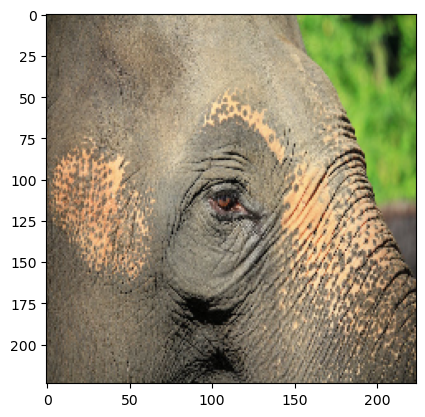

In [19]:
with open("ilsvrc2012_wordnet_lemmas.txt", "r") as f:
    lines = f.readlines()
imagenet_int_to_str = [line.rstrip() for line in lines]

img_url = "https://images.pexels.com/photos/6477261/pexels-photo-6477261.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
image = load_image_from_url(img_url)

plt.imshow((image[0] + 1) / 2)
plt.show()

- It demonstrates the use of Vision Transformer, an image classification model. First, the model is loaded by providing a TensorFlow Hub URL. The loaded model is then used with a predefined list of classes to predict which class an image belongs to. The given image is first preprocessed using the **load_image_from_url** function. Then, predictions are made using the **classification_model** and finally the highest predicted class label is stored in the **predicted_label** variable.

In [20]:
model_url = '/kaggle/input/vision-transformer/tensorflow2/vit-s16-classification/1'

classification_model = tf.keras.Sequential(
    [hub.KerasLayer(model_url)]
)
predictions = classification_model.predict(image)
predicted_label = imagenet_int_to_str[int(np.argmax(predictions))]
predicted_label

1/1 [==============================] - 13s 13s/step


'Indian_elephant, Elephas_maximus'

# Automatic Animal Species Recognition - Classification

Please enter an animal picture URL (Press 'q' to end the programme):  http://3.bp.blogspot.com/-X17BueaHM9o/UMn4aoWKhNI/AAAAAAAAPDk/4zlyQyy2SjE/s1600/Arctic+Fox+Wallpapers+02.jpg


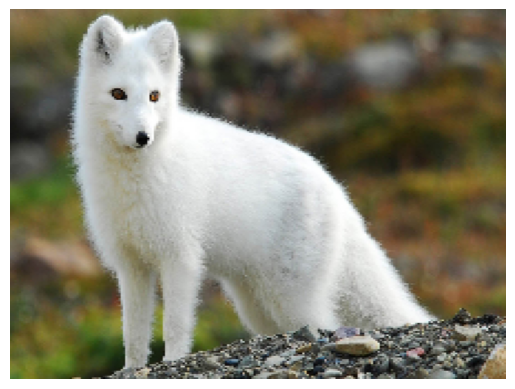

1/1 [==============================] - 13s 13s/step
Estimated animal species:  Arctic_fox, white_fox, Alopex_lagopus


Please enter an animal picture URL (Press 'q' to end the programme):  https://www.medioambiente.net/wp-content/uploads/chita-asi%C3%A1tico.jpg


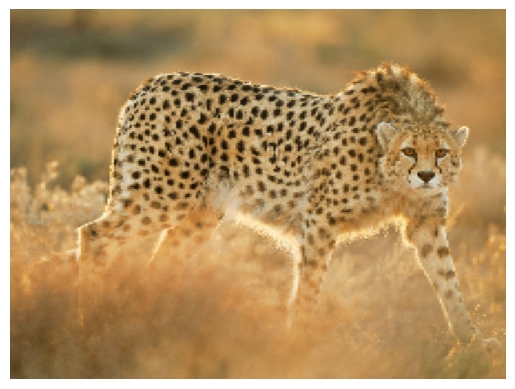

1/1 [==============================] - 14s 14s/step
Estimated animal species:  cheetah, chetah, Acinonyx_jubatus


Please enter an animal picture URL (Press 'q' to end the programme):  https://dogfoodcare.com/wp-content/uploads/2021/03/Beagle-1.jpg


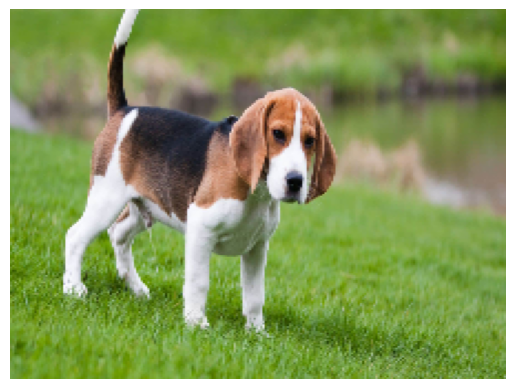

1/1 [==============================] - 13s 13s/step
Estimated animal species:  beagle


Please enter an animal picture URL (Press 'q' to end the programme):  https://tse2.mm.bing.net/th?id=OIP.KHPBFVABBXrQw0ZmHYYcUAHaE9&pid=Api&P=0


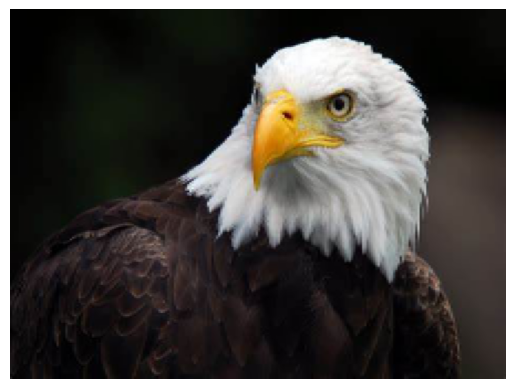

1/1 [==============================] - 14s 14s/step
Estimated animal species:  bald_eagle, American_eagle, Haliaeetus_leucocephalus


Please enter an animal picture URL (Press 'q' to end the programme):  q


In [22]:
while True:
    url = input("Please enter an animal picture URL (Press 'q' to end the programme): ")
    if url == "q":
        break
    
    try:
        image = load_image_from_url(url)
        plt.imshow((image[0] + 1) / 2, aspect='auto')
        plt.axis('off')
        plt.show()

        model_url = '/kaggle/input/vision-transformer/tensorflow2/vit-s16-classification/1'
        classification_model = tf.keras.Sequential([hub.KerasLayer(model_url)])
        predictions = classification_model.predict(image)
        predicted_label = imagenet_int_to_str[int(np.argmax(predictions))]
        print("Estimated animal species: ", predicted_label)
        
    except:
        print("Error: You entered an invalid URL. Please try again.")
